In [ ]:
#reset

In [ ]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
import math
from sklearn.metrics import r2_score

In [ ]:
data = pd.read_csv("TimeTest.csv", delimiter=';')
column_names = ['Time', 'Reading1', 'Reading2', 'Reading3', 'Reading4','Runs']
df = pd.DataFrame(data)
df.columns = column_names

#df_filtered = df.applymap(lambda x: np.nan if pd.notna(x) and (not isinstance(x, (int, float)) or x < 0) else x).dropna()
#df=df_filtered

print(df)

               Time  Reading1  Reading2  Reading3  Reading4  Reading5  Runs
0   2023-6-21 20:33      68.9      62.2      61.0      67.1      60.5     2
1   2023-6-21 20:34      69.0      62.2      61.3      67.1      60.8     3
2   2023-6-21 20:35      69.0      62.2      61.4      67.1      60.7     4
3   2023-6-21 20:36      69.0      62.3      61.6      67.1      60.7     5
4   2023-6-21 20:37      72.6      67.0      66.1      73.7      62.8     6
5   2023-6-21 20:38      72.6      67.0      65.9      73.7      62.8     7
6   2023-6-21 20:39      72.5      67.0      65.9      73.7      62.8     8
7   2023-6-21 20:40      72.5      67.0      66.1      73.7      62.8     9
8   2023-6-21 20:41      76.0      67.0      66.3      73.7      73.8    10
9   2023-6-21 20:42      82.7      74.4      74.0      88.7      73.8    11
10  2023-6-21 20:43      82.7      74.4      74.0      88.7      73.8    12
11  2023-6-21 20:44      82.6      74.4      73.9      88.7      73.8    13
12  2023-6-2

In [ ]:
times=df['Time']
timestamps = [datetime.strptime(t, '%Y-%m-%d %H:%M') for t in times]
x=df['Time']

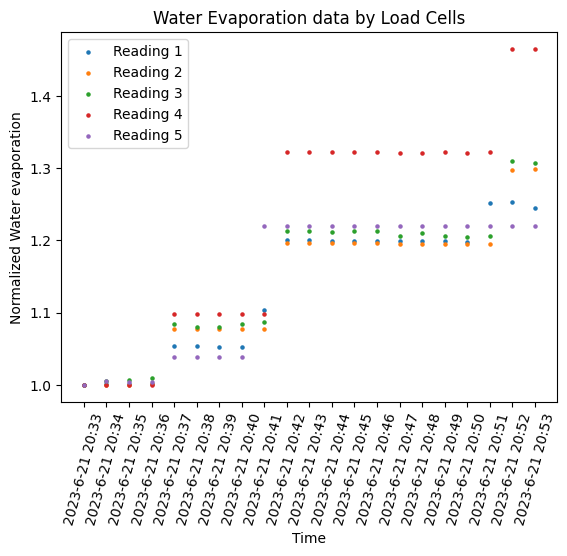

In [ ]:
# Extract the y-intercept values for each set of data
y1_intercept = df['Reading1'].iloc[0]
y2_intercept = df['Reading2'].iloc[0]
y3_intercept = df['Reading3'].iloc[0]
y4_intercept = df['Reading4'].iloc[0]

# Create a copy of the original DataFrame for normalization
df_normalized = df.copy()

# Adjust each set of data by dividing by the respective intercept value
df_normalized['Reading1'] = df['Reading1'] / y1_intercept
df_normalized['Reading2'] = df['Reading2'] / y2_intercept
df_normalized['Reading3'] = df['Reading3'] / y3_intercept
df_normalized['Reading4'] = df['Reading4'] / y4_intercept

# Extract the adjusted y-values for each set
y1 = df_normalized['Reading1']
y2 = df_normalized['Reading2']
y3 = df_normalized['Reading3']
y4 = df_normalized['Reading4']

# Create the plot
plt.scatter(x, y1, label='Reading 1', s=5)
plt.scatter(x, y2, label='Reading 2', s=5)
plt.scatter(x, y3, label='Reading 3', s=5)
plt.scatter(x, y4, label='Reading 4', s=5)

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Normalized Water evaporation')
plt.title('Water Evaporation data by Load Cells')

# Set the axis limits #Use to zoom in
#x_min, x_max = x[0], x[-1]
#y_min, y_max = 0.75, 1

# Set the axis limits
#plt.xlim(x_min, x_max)
#plt.ylim(y_min, y_max)

# Rotate the x-axis tick labels by 45 degrees
plt.xticks(rotation=75)

# Add legend
plt.legend()

# Save the graph as an image file
plt.savefig('graph.png')

# Show the plot
plt.show()

Equation 1: y1 = -4.80e-05x^3 + 1.26e-03x^2 + 7.86e-03x + 9.61e-01
Equation 2: y2 = 2.28e-05x^3 + -1.12e-03x^2 + 2.98e-02x + 9.16e-01
Equation 3: y3 = 1.54e-05x^3 + -9.41e-04x^2 + 2.96e-02x + 9.18e-01
Equation 4: y4 = -2.39e-05x^3 + 3.66e-04x^2 + 2.67e-02x + 9.08e-01
Equation 5: y5 = -9.76e-05x^3 + 2.58e-03x^2 + 5.69e-04x + 9.69e-01
R2_1: 0.912
R2_2: 0.883
R2_3: 0.881
R2_4: 0.88
R2_5: 0.868


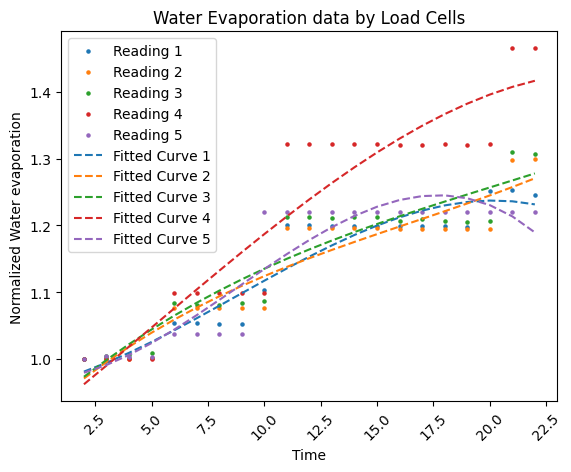

In [ ]:
# Define x using appropriate values (replace with your own values)
x = df['Runs']

# Fit a polynomial curve of degree n to the data
n = 3  # Example: Fit a polynomial of degree 3
coeffs1 = np.polyfit(x, y1, n)
coeffs2 = np.polyfit(x, y2, n)
coeffs3 = np.polyfit(x, y3, n)
coeffs4 = np.polyfit(x, y4, n)

# Fit a polynomial curve of degree n to the data
n = 3  # Example: Fit a polynomial of degree 3
coeffs1 = np.polyfit(x, y1, n)
coeffs2 = np.polyfit(x, y2, n)
coeffs3 = np.polyfit(x, y3, n)
coeffs4 = np.polyfit(x, y4, n)

# Generate fitted y-values using the polynomial coefficients
y_fit1 = np.polyval(coeffs1, x)
y_fit2 = np.polyval(coeffs2, x)
y_fit3 = np.polyval(coeffs3, x)
y_fit4 = np.polyval(coeffs4, x)

# Create the plot
plt.scatter(x, y1, label='Reading 1', s=5)
plt.scatter(x, y2, label='Reading 2', s=5)
plt.scatter(x, y3, label='Reading 3', s=5)
plt.scatter(x, y4, label='Reading 4', s=5)

# Plot the fitted curves
plt.plot(x, y_fit1, linestyle='--', label='Fitted Curve 1')
plt.plot(x, y_fit2, linestyle='--', label='Fitted Curve 2')
plt.plot(x, y_fit3, linestyle='--', label='Fitted Curve 3')
plt.plot(x, y_fit4, linestyle='--', label='Fitted Curve 4')

# Construct the equations using the polynomial coefficients
equation1 = f'y1 = {coeffs1[0]:.2e}x^3 + {coeffs1[1]:.2e}x^2 + {coeffs1[2]:.2e}x + {coeffs1[3]:.2e}'
equation2 = f'y2 = {coeffs2[0]:.2e}x^3 + {coeffs2[1]:.2e}x^2 + {coeffs2[2]:.2e}x + {coeffs2[3]:.2e}'
equation3 = f'y3 = {coeffs3[0]:.2e}x^3 + {coeffs3[1]:.2e}x^2 + {coeffs3[2]:.2e}x + {coeffs3[3]:.2e}'
equation4 = f'y4 = {coeffs4[0]:.2e}x^3 + {coeffs4[1]:.2e}x^2 + {coeffs4[2]:.2e}x + {coeffs4[3]:.2e}'

r2_1 = r2_score(y1, y_fit1)
r2_2 = r2_score(y2, y_fit2)
r2_3 = r2_score(y3, y_fit3)
r2_4 = r2_score(y4, y_fit4)

# Print the equations
print('Equation 1:', equation1)
print('Equation 2:', equation2)
print('Equation 3:', equation3)
print('Equation 4:', equation4)

# Print the R-squared values
print('R2_1:', round(r2_1, 3))
print('R2_2:', round(r2_2, 3))
print('R2_3:', round(r2_3, 3))
print('R2_4:', round(r2_4, 3))

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Normalized Water evaporation')
plt.title('Water Evaporation data by Load Cells')

# Set the axis limits
#x_min, x_max = x[0], x[-1]  # Example: Set the desired minimum and maximum x-axis values
#y_min, y_max = 0.75, 1  # Example: Set the desired minimum and maximum y-axis values
#plt.xlim(x_min, x_max)
#plt.ylim(y_min, y_max)

# Rotate the x-axis tick labels by 45 degrees
plt.xticks(rotation=45)

# Add legend
plt.legend()

# Save the graph as an image file
plt.savefig('graph_fit.png')

# Show the plot
plt.show()